In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
from data_generators import get_train_test_sorting

## Oppgave 1 - Forstå hvordan datasettene og transformermodellen er strukturert

##### 1.1 Gi et eksempel (som i likning $(10)$) på hvordan et datasett ${x, y}$ ville sett ut for å trene en transformermodell for å predikere et heltall $d$ gitt $d = a · b + c$ der $a, c$ er tosifrede heltall, mens $b$ er et ettsifret heltall, altså $9 ≥ b ∈ Z$.

Et sett av treningsdata kan genereres ved å la x bestå av sifrene i $a, b, c$ og alle sifrene i $d$ med unntak av det siste og lar $y = d$. Dermed vil formen for x være gitt ved $x = [a_0 , \cdot \cdot \cdot, a_{r-1}, b_0, \cdot \cdot \cdot, b_{r-1}, c_0, \cdot \cdot \cdot, c_{r-1}, d_0, \cdot \cdot \cdot, d_{r-1}]$. Gitt betingelsene i oppgaven over, la $r$ = 2, $a$ = 24, $b$ = 4, $c$ = 15 og dermed <br> $d$ = 111.  som gir oss x = $[2, 4, 4, 1, 5, 1, 1]$ og $y = [1, 1, 1]$. Merk at siste siffer i $d$ ikke er del av datasettet i x.  Modellen skal da gi $\hat{z}$. Lengden av $\hat{z}$, $n$, vil være gitt av lengden av x som har med lengden $n$. $\hat{z}$ = [$\hat{z}_0$, \cdot \cdot \cdot, $\hat{z}_5$] =  $f_{\theta}([2, 4, 4, 1, 5, 1, 1])$. Ideelt er $\theta$ optimert til en slik grad at <Br> $\hat{y} = [\hat{z}_3, \hat{z}_4, \hat{z}_5] = [1, 1, 1] = y$ er korrekt predikert.

##### 1.2) Når optimeringen er ferdig, hvordan kan vi bruke modellen $f_{\theta}$  til å predikere $d$ gitt $a, b, c$? Vis dette med et eksempel, på samme måte som i likning $(11)$.

Gitt at optmeringen er ferdig, kan modellen korrekt predikere $d$. Denne prossesen av å predikere de neste sifferene i seqvensen gjøres fra å lære av de oppgitte datasettene. Følgende tabell viser hvordan dette fungerer. La verdiene være det samme som i forrige oppgave, $r = 2, a = 24, b = 4,$<Br> $c = 15$

| Iterasjoner | Modell |
|----------|----------|
| $x^{(0)} = [2, 4, 0, 4, 1, 5]$ | $[\hat{z}_0^{(0)}, \hat{z}_1^{(0)}, \hat{z}_2^{(0)}, \hat{z}_3^{(0)}] = f_{\theta}(x^{(0)})$|
| $x^{(1)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}]$ | $[\hat{z}_0^{(1)}, \cdot \cdot \cdot, \hat{z}_4^{(1)}] = f_{\theta}(x^{(1)})$ |
| $x^{(2)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}, \hat{z}_4^{(1)}]$ | $[\hat{z}_0^{(2)}, \cdot \cdot \cdot, \hat{z}_5^{(2)}] = f_{\theta}(x^{(2)})$  |
| $x^{(3)} = [2, 4, 0, 4, 1, 5, \hat{z}_3^{(0)}, \hat{z}_4^{(1)}, \hat{z}_5^{(2)}]$ |  |

Disse predikasjonene hentes ut og returneres som $\hat{y} = [\hat{z}_3^{(0)}, \hat{z}_4^{(1)}, \hat{z}_5^{(2)}]$ som bør være likt $y$.

##### 1.3) Anta at vi bruker cross-entropy som objektfunksjon, at $m = 5$ og $y = [4, 3, 2, 1]$. Hvilke diskret sannsynlighetsfordeling $\hat{Y}$ ville gitt en objektfunksjon $L(θ, D) = 0$? Hva ville $\hat{y}$ vært i dette tilfellet?

Cross entropy er gitt ved $L(θ, D) = -\frac{1}{D \cdot n} \sum_{i=0}^{D-1} \sum_{j=0}^{n-1} \log \hat{Y}_{k,j}^{(i)}$ hvor $D$ er datapunktene, $\theta $
er parameterne, og $\hat{Y}$ er sannsynlighetsfordelingen til den predikterte modellen, samt er $j$ og $i$ dimensjonene til $\hat{Y}$. Det objektfunksjonen gjør er å sammenligne onehot(y) med $\hat{Y}$. Hvis $L(θ, D) = 0$ vil den optimerte modellen og onehot(y) være identiske. Når dette inntreffer vil $argmax_{\text{col}}(\hat{Y})$ = $\hat{y}$ som igjen er lik $y$. I dette tilfellet er $y = [4,3,2,1]$, som også vil være lik $\hat{y}$.
$\hat{Y}$ vil være gitt av den diskrete sannsynlighetsfordelingen:<Br><Br> $\hat{Y}$ =
$\left[\begin{array}{ccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{array}\right]$ , <Br><Br> som er lik onehot($[4,3,2,1]$). Dette betyr i praksis at paramtetrene i transformenmodellen klarer å prediktere hva som kommer videre i sekvensen og vi ender opp med samme antatt løsning ($\hat{y}$) som faktisk løsning.




##### 1.4) Gitt $d, m, n_{max}, k, p$ og $L$. Hvor mange enkeltparametre har en transformermodell? Med enkeltparametre mener vi hvor mange tall $w ∈ R$ vi må bestemme ved optimering. En matrise $W ∈ R^{m×n}$ består av $m · n$ tall eller enkeltparametre.

Med gitte variabler for $d, m, n_{max}, k, p$ og  $L$ er antall enkeltparametre mulig å bestemme. Enkeltparametre er gitt med $w \in \mathbb{R}$ noe som uttrykkes med å se på dimensjoner for ulike parametermatriser i transformermodellen.

$W_E$ og $W_P$ har henholdsvis dimensjonene $W_E \in \mathbb{R}^{d \times m}$ og $ W_P \in \mathbb{R}^{d \times n_{max}} $ som representerer parametermatrisen til en sekvens for x med lengde n, som skrives som $z_0$. I tilegg ønskes det å gjøre $L$ paramtriserte trasformasjoner på $z_0$, så man ender opp med $L \cdot (d \times m + d \times n_{max})$ for embedding delen av enkeltparamtrene. Under unenbeddingen oppstår en ny parametermatrise $W_U$ som er en sekvens med lengde $n$ med heltall opp til $m$, den har dimensjonene $ W_U \in \mathbb{R}^{d \times m} $. Attention-lag bidrar også til antall enkeltparamtre for transformmodellen, der har man 4 parametermatriser; $W_O, W_V, W_Q, W_K$ alle med samme dimensjon $\mathbb{R}^{k \times d} $. Transformermodellen har også en $feed$-$forward $ del som bidrar med to paramtermatriser $W_1$ og $W_2$ begge med dimensjoner $\mathbb{R}^{p \times d} $


Hvis man tar disse parametermatrisene i betrakning og antar at $k < d < p$ vil man ha: 
$w = d \times m+L\cdot (d \times m + d \times n_{max}) + 4 \cdot k \times d + 2 \cdot p \times d $, enkeltparametre. (siden k og p er heltall man bestemmer selv er dette en rimelig antagelse å ta).


##### 1.5 Transformermodellen er gitt i likningene $(4) - (9)$. La $n = n_{max} = 1,$  $m = d = k = p=2$ og $L=1$. Anta videre at $W_O = W_V = W_Q = W_K = W_1 = W_2 = W_U = I_{2×2}$ og at $σ(x) = Relu(x) = max(0, x)$. Dersom <Br> $W_E = \left[\begin{array}{ccc} 1 & 0 \\ 0 & \alpha \end{array} \right]$ , og $W_P$ = $\left[\begin{array}{ccc} 1 \\ 0 \end{array} \right]$ vis at vi må ha $\alpha > 1$ for å få  $\hat{z} = [1]$ som output når input er $x = [1]$.

$L=n = n_{max}= x = 1$ og $m=d=k=p=d = 2$ og alle parametermatrisene lik 
$\left[\begin{array}{ccc}
1 & 0 \\
0 & 1 
\end{array}\right]$ = $ I_{2\times 2}$ utenom $W_E$ som er $\left[\begin{array}{ccc}
1 & 0 \\
0 & \alpha
\end{array}\right]$ og $W_P$ = $\left[\begin{array}{ccc}
1 \\
0 
\end{array}\right]$

Med dette oppgitt vil  $ X = onehot(x) = \left[\begin{array}{ccc}0 \\1 
\end{array}\right]$ som resulterer i en $z_0 = \left[\begin{array}{ccc}0 \\ \alpha 
\end{array}\right]+ \left[\begin{array}{ccc}1 \\ 0 
\end{array}\right]$ =$\left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$. For å videre bestemme et uttrykk for $\hat{z}$ må vi se på hva transformermodellen gjør med $z_0$. videre er 

$z_{1/2}$ = $z_0 + W_O^T  W_V  z_0 A(z_0)$ hvor $A(z_0)$ = $softmax_{col}(z_0^T W_Q^T W_K z_0+D)$ hvor D sørger for at den strengt nedre delen av A er 0.
Ved å løse $A(z_0)$ får man utrykket $(1+ \alpha ^2)$ i softmax funksjonen.

$z_{1/2} = \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right] + I_{2 \times 2} I_{2 \times 2} \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right] softmax(1+ \alpha ^2)$ = $ 2 \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$ fordi softmax av et utrykk blir å dele på seg selv i e-potens som blir 1.

for $z_1$ får vi et uttrykk som er $z_{1/2} + W_2^T \sigma (W_1 z_{1/2})$, $\sigma$ er en aktiveringsfunskjon, i dette tilfelle kan man bruke $relu(W_1 z_{1/2})$.
Utrykket blir da:

$z_1 = 2  \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]+ I_{2 \times 2} max(0,I_{2 \times 2} 2 \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]) $ = $ 4  \left[\begin{array}{ccc}1 \\ \alpha 
\end{array}\right]$
 
Ved hjelp av $z_1$ kan man ta i bruk likning (8) for å finne sannsynlighetsfunksjonen $Z$. $Z = softmax_{col}(W_U^T Z_1)$, argumentet $W_U^T z_1$ blir lik $z_1$ og softmax gir oss $Z = \frac{1}{e^4 + e^{4 \alpha}} \left[\begin{array}{ccc}e^4 \\ e^{4 \alpha }
\end{array}\right]$

for å få $\hat{z} = [1]$ må $argmax(Z)$ bli 1, og dette krever at verdien på indeks [1] må være større enn den på indeks [0], da må $e^4 < e^{4 \alpha}$ og dette impliserer at $\alpha >1$ 




## Oppgave 2 - Objektorientert programmering for transformermodell

#### 2.1

I layers classen fungerer layers som en base klasse for alle andre typer layers i nettverket. Her implementeres en basis versjon av metoder som forward(), backward() og step_gd(). Dette vil si at alle layers som arver fra Layers base klassen implementerer eller overskriver disse metodene. Dette vil si at hvis vi vet at et objekt arver fra Layers klassen så vet vi at dette objektet har metodene forward(), backward() og step_gd(). Denne strukturen tillater også at et lag har sin egen spesifisert step_gd() med at det kan overskrive metoden til å være mest hensiktsmessig for det spesifikke laget, dette gjør at neural_network kan operere på et høyere abstraksjonsnivå og kan implementere metoder som step_gd() uten å trenge å vite de spesifikke detaljene til hvert lag. 

Mer spesifikt her bruker neural_network arv til å kunne behandle alle sine layers på samme måte, selv om de kan ha forskjellig implementerte step_gd() metoder. Polymorfisme lar da neural_network kalle samme funksjon (step_gd()) på samme måte for hvert lag uten å vite hvilken subklasse hvert layer tilhører.

#### 3.2

In [6]:
b = 6
n_max = 7
m = 8
n = 5

d = 10
k = 5
p = 20
alpha = 0.000078
n_iter = 300

x = np.random.randint(0, m, (b,n_max))
y = np.random.randint(0, m, (b,n_max-1))
loss = CrossEntropy()
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1,feed_forward1, un_embed_pos, softmax]
nueralnettest = NeuralNetwork(layers)

def algorithm_4(x, y,n_iter,alpha, m , nueralnet):
    
    

    
    Losses = []
    for j in range(1,n_iter):
        X = onehot(x, m)
        Z = nueralnet.forward(X) 
        Losses.append(loss.forward(Z,y[:,:-4]))
        dLdz = loss.backward()
        nueralnet.backward(dLdz) 
        nueralnet.step_adam(j,alpha)
        print(f'loss for iteration {j}: {loss.forward(Z,y)}') 
    return Losses   

arr = algorithm_4(x, y,n_iter, alpha, m, nueralnettest)

loss for iteration 1: 2.0784993186713105
loss for iteration 2: 2.078453058124809
loss for iteration 3: 2.0784066924701055
loss for iteration 4: 2.07836028138742
loss for iteration 5: 2.078312614659991
loss for iteration 6: 2.0782647729359387
loss for iteration 7: 2.078216938181394
loss for iteration 8: 2.0781691236169326
loss for iteration 9: 2.0781213775342047
loss for iteration 10: 2.078073739830462
loss for iteration 11: 2.078026258520393
loss for iteration 12: 2.077978986243642
loss for iteration 13: 2.0779319756875014
loss for iteration 14: 2.0778852812705297
loss for iteration 15: 2.077838956174557
loss for iteration 16: 2.0777930482646125
loss for iteration 17: 2.077747600798622
loss for iteration 18: 2.077702631628812
loss for iteration 19: 2.0776581482427234
loss for iteration 20: 2.07761414118658
loss for iteration 21: 2.0775705858382083
loss for iteration 22: 2.0775274458001873
loss for iteration 23: 2.0774846769658506
loss for iteration 24: 2.0774422314183343
loss for itera

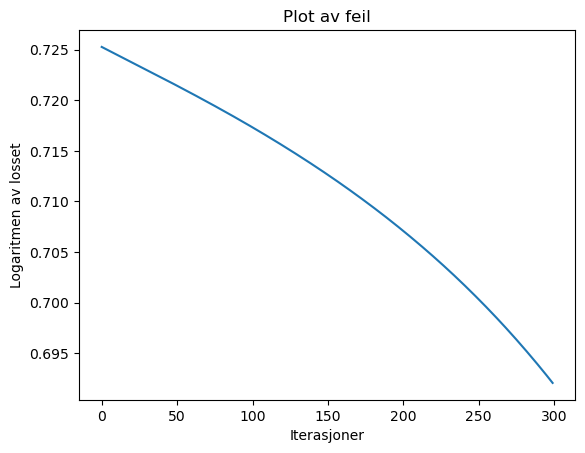

In [7]:
plt.plot(np.linspace(0,len(arr),len(arr)),np.log(arr))
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil')
plt.show()

#### 3.3

In [9]:
#training the module
r = 5
m = 2
d = 10
k = 5
p = 15
L = 2
n_max = 2*r - 1
n_iter = 500
alpha = 0.00005

data = get_train_test_sorting(r, m, 250, 10,10)

loss = CrossEntropy()
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed_pos = LinearLayer(d,m)
softmax = Softmax()
layers = [embed_pos, attention1,feed_forward1, un_embed_pos, softmax]
nueralnetsort = NeuralNetwork(layers)

x = data['x_train'][0]
y = data['y_train'][0]

x_t = data['x_test'][0]
y_t = data['y_test'][0]


arr2 = algorithm_4(x, y, n_iter, alpha, m ,  nueralnetsort)

loss for iteration 1: 0.7672876796720189
loss for iteration 2: 0.7659964571602259
loss for iteration 3: 0.7647224334704639
loss for iteration 4: 0.7634669047489543
loss for iteration 5: 0.7622309272008697
loss for iteration 6: 0.7610147203854821
loss for iteration 7: 0.759818036134478
loss for iteration 8: 0.7586409109675402
loss for iteration 9: 0.7574803961799603
loss for iteration 10: 0.756337253494642
loss for iteration 11: 0.7552130079538032
loss for iteration 12: 0.7541075956307038
loss for iteration 13: 0.7530207512497095
loss for iteration 14: 0.7519523608372373
loss for iteration 15: 0.7509023016405937
loss for iteration 16: 0.7498704397757738
loss for iteration 17: 0.7488566349479758
loss for iteration 18: 0.7478607471652554
loss for iteration 19: 0.7468826404617664
loss for iteration 20: 0.7459221841272801
loss for iteration 21: 0.7449792522164211
loss for iteration 22: 0.7440537222432433
loss for iteration 23: 0.7431454736816339
loss for iteration 24: 0.7422543865831006
los

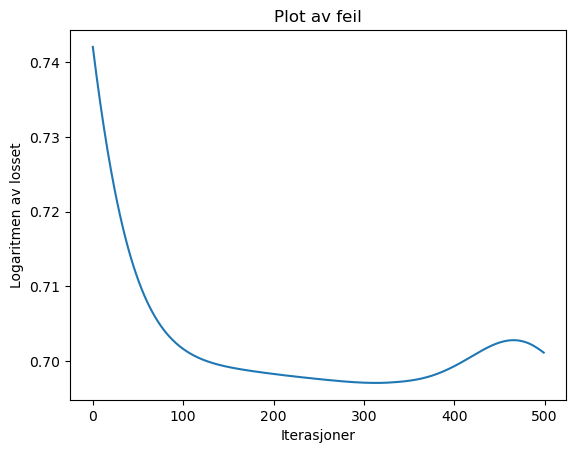

In [12]:
plt.plot(np.linspace(0,len(arr2),len(arr2)),arr2)
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil')
plt.show()

In [ ]:
def sorting(neuralnet, x, y):
    X = onehot(x, m)
    Z = neuralnet.forward(X)
    print(loss.forward(Z,y))
    Y_hat = loss.backward()
    Z_hat = neuralnet.backward(Y_hat)
    amount = 0
    total = 0
    Z_hat = Z_hat[:,:, -y.shape[-1]:]
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if Z_hat[i][j] == y[i][j]:
                amount += 1
            total+=1
    return amount/total

per = sorting(nueralnetsort, x_t, y_t)
print(f'prosent riktig er {per*100}')